In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [23]:
mu = 100
sigma = 10

In [24]:
population = np.round(np.random.normal(mu, sigma, 10000), 2)

In [25]:
population

array([ 87.74,  98.15, 105.8 , ...,  94.15,  98.96,  99.91])

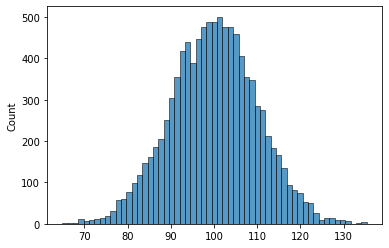

In [52]:
sns.histplot(population, kde=False)

In [26]:
population.mean()

99.928557

In [27]:
population.std()

9.98806027053056

In [28]:
#выбираем выборку из ГС без повторений

In [29]:
sample_size = 30

In [34]:
sample = np.random.choice(population, sample_size, False)
sample

array([108.71,  86.79,  84.66, 105.37, 103.8 ,  92.74,  78.39,  96.19,
       100.29,  91.66, 104.67, 102.91, 110.2 , 107.46, 101.81,  76.17,
        90.92, 108.37, 118.11, 104.77, 101.73,  98.64,  83.36,  96.44,
       107.43,  86.3 , 108.13, 100.99,  93.29,  93.84])

Пользователи тратят примерно 100 рублей, чуть больше, чуть меньше. Задача: понять, чему равняется среднее значение месячных трат для пользователей. Посчитав это на выборке размера sample_size

In [39]:
#не можем взять среднее выборки и считать, что она равна среднему ГС, тк каждая новая рандомная выборка будет давать немного отличающиеся значения. Но мы видим некоторый интервал значений mean
sample.mean()

98.13799999999999

Как оценить, в каких диапазонах лежит среднее значение?

In [56]:
n = 10000
sample_means = []

In [57]:
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_means.append(sample.mean())

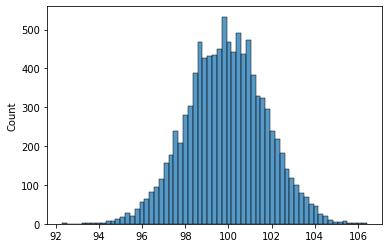

In [60]:
sns.histplot(sample_means, kde=False)

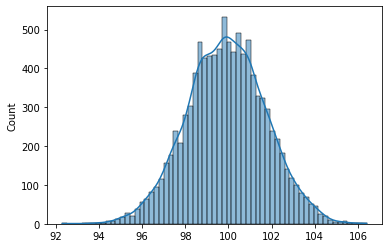

In [61]:
sns.histplot(sample_means, kde=True)

In [62]:
np.mean(sample_means)

99.89747416666667

In [63]:
population.mean()

99.928557

Чем больше выборок мы бы брали, тем ближе становилось бы среднее к среднему ГС. Но полагаться на отдельно взятую выборку нельзя. Нужно придумать интервал, в котором будет лежать наша величина.

Нормальное распределение, правило трёх сигм. 

Правило 1.96 сигм – 95% в этом диапазоне. Но чему равняется сигма (стандартное отклонение) распределения средних?

```SE = sigma/n^1.2```

In [64]:
SE = population.std()/sample_size ** 0.5
SE

1.82356197196358

In [65]:
np.std(sample_means)

1.8162069035154238

Среднее всех средних распределится нормально, а 95% всех наблюдений окажется в диапазоне +- 1.96 сигм

In [67]:
population.mean() + 1.96 + SE

103.71211897196358

In [68]:
population.mean() - 1.96 + SE

99.79211897196359

Выборочные средние меняются, но при этом 95% лежали бы в диапазоне между этими границами. Это и есть **доверительный интервал**

Центральная предельная теорема работает :)

In [73]:
sample_real = np.random.choice(population, sample_size, False)

У нас есть только одна выборка, и мы не можем повторять 10000 раз измерения. Как по одной выборке мы оценим всю совокупность?

In [74]:
sample_real.mean()

99.12533333333334

In [76]:
sample_real.std()

10.986331123516877

In [77]:
# se = sd / корень(n)

In [78]:
se = sample_real.std() / sample_size ** 0.5

In [79]:
se

2.005820460190423

In [80]:
sample_real.mean() + 1.96 * se

103.05674143530658

In [81]:
sample_real.mean() - 1.96 * se

95.19392523136011

Если *совсем* упростить, то с 95% реальное среднее лежит в диапазоне от 95 до 103

Рассчитайте 99% доверительный интервал для следующего примера:



In [103]:
x = 10
sd = 5
n = 100

In [104]:
def got_interval (x, sd, n, z):
    se = sd / n ** 0.5
    print(x + z * se)
    print(x - z * se)

In [105]:
got_interval(x, sd, n, 2.576)

11.288
8.712


Hассчитайте 95% доверительный интервал для среднего значения, на примере с тестированием нового препарата.  Параметры: n=64,sd=4, 
X=18.5

In [106]:
x = 18.5
sd = 4
n = 64

In [107]:
got_interval(x, sd, n, 1.96)

19.48
17.52
